In [1]:
# Загрузка зависимостей
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
from statsmodels.graphics.gofplots import qqplot

Using TensorFlow backend.


In [2]:
# Загрузка подготовленного набора данных
dataset = pd.read_csv('prepared_data.csv')
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,num
0,0.927622,1.0,1.000000,0.624287,-0.206993,1.0,0.000000,0.090789,0.0,0.552201,0.000000,0.0,1.0
1,-2.117138,1.0,0.816497,0.454038,0.159591,0.0,0.397544,1.444548,0.0,0.715169,0.000000,0.0,1.0
2,-1.529863,0.0,0.577350,0.454038,-0.864692,0.0,0.000000,0.931137,0.0,0.398844,1.000000,0.0,1.0
3,0.253797,1.0,0.577350,0.335019,-0.141353,0.0,0.397544,1.141680,0.0,0.265991,1.000000,0.0,1.0
4,0.355054,0.0,0.000000,0.335019,2.100829,0.0,0.397544,0.601134,1.0,0.210865,1.000000,0.0,1.0
5,0.355054,1.0,0.000000,0.568560,-1.150460,0.0,0.397544,0.008368,0.0,0.145476,0.707107,0.0,1.0
6,0.253797,0.0,0.577350,0.568560,1.054214,0.0,0.000000,0.212382,0.0,0.379044,0.707107,0.0,1.0
7,-1.125867,1.0,0.577350,0.335019,0.431579,0.0,0.397544,0.966733,0.0,0.323580,1.000000,0.0,1.0
8,-0.170168,1.0,0.816497,0.909866,-0.982712,1.0,0.397544,0.563348,0.0,0.179818,1.000000,0.0,1.0
9,0.355054,1.0,0.816497,0.679061,-1.750157,0.0,0.397544,1.002123,0.0,0.436427,1.000000,0.0,1.0


In [3]:
X = dataset.iloc[:, [*range(1,13),12]].values
Y = dataset['age'].values

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [5]:
# Задаем параметры структуры нейронной сети.


input_layer_size = 13


first_hidden_layer_size = 15
second_hidden_layer_size = 15

output_layer_size = 1


epochs_number = 50
batch_size = 16

In [6]:
# Создание нейронной сети прямого распространения, пока она пустая, т.е. не содержит слоёв и нейронов.
model = Sequential()

# Входной слой и первый скрытый слой, функция активации - ReLU
model.add(Dense(first_hidden_layer_size, input_dim=input_layer_size, activation='relu'))

model.add(Dense(second_hidden_layer_size, activation='relu'))

model.add(Dense(output_layer_size, activation='linear'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 466
Trainable params: 466
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Настройка нейронной сети.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [9]:
# Обучение нейронной сети.
history = model.fit(X_train, Y_train, validation_data = (X_test,Y_test), epochs=epochs_number, batch_size=batch_size)

Train on 242 samples, validate on 61 samples
Epoch 1/50
242/242 [==============================] - 0s 2ms/step - loss: 1.1641 - mean_absolute_error: 0.9051 - mean_squared_error: 1.1641 - val_loss: 0.8838 - val_mean_absolute_error: 0.8249 - val_mean_squared_error: 0.8838
Epoch 2/50
242/242 [==============================] - 0s 127us/step - loss: 1.0540 - mean_absolute_error: 0.8463 - mean_squared_error: 1.0540 - val_loss: 0.8069 - val_mean_absolute_error: 0.7890 - val_mean_squared_error: 0.8069
Epoch 3/50
242/242 [==============================] - 0s 182us/step - loss: 0.9998 - mean_absolute_error: 0.8121 - mean_squared_error: 0.9998 - val_loss: 0.7474 - val_mean_absolute_error: 0.7605 - val_mean_squared_error: 0.7474
Epoch 4/50
242/242 [==============================] - 0s 273us/step - loss: 0.9502 - mean_absolute_error: 0.7885 - mean_squared_error: 0.9502 - val_loss: 0.7089 - val_mean_absolute_error: 0.7399 - val_mean_squared_error: 0.7089
Epoch 5/50
242/242 [=========================

Epoch 37/50
242/242 [==============================] - 0s 255us/step - loss: 0.6433 - mean_absolute_error: 0.6392 - mean_squared_error: 0.6433 - val_loss: 0.5568 - val_mean_absolute_error: 0.6109 - val_mean_squared_error: 0.5568
Epoch 38/50
242/242 [==============================] - 0s 203us/step - loss: 0.6421 - mean_absolute_error: 0.6386 - mean_squared_error: 0.6421 - val_loss: 0.5538 - val_mean_absolute_error: 0.6012 - val_mean_squared_error: 0.5538
Epoch 39/50
242/242 [==============================] - 0s 228us/step - loss: 0.6367 - mean_absolute_error: 0.6330 - mean_squared_error: 0.6367 - val_loss: 0.5548 - val_mean_absolute_error: 0.6072 - val_mean_squared_error: 0.5548
Epoch 40/50
242/242 [==============================] - 0s 193us/step - loss: 0.6391 - mean_absolute_error: 0.6373 - mean_squared_error: 0.6391 - val_loss: 0.5585 - val_mean_absolute_error: 0.6093 - val_mean_squared_error: 0.5585
Epoch 41/50
242/242 [==============================] - 0s 242us/step - loss: 0.6309 

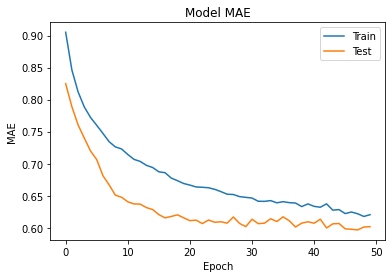

In [10]:
# Выводим динамику среднего абсолютного отклонения от номера эпохи обучения.
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error']) 
plt.title('Model MAE') 
plt.ylabel('MAE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

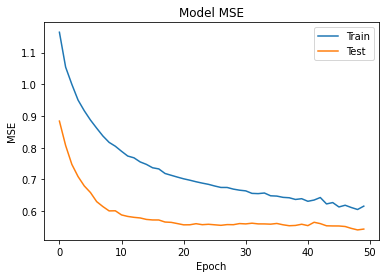

In [11]:
# Выводим динамику среднеквадратического отклонения, т.е. значения функции потерь, от номера эпохи обучения.
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error']) 
plt.title('Model MSE') 
plt.ylabel('MSE') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()

In [12]:
# Предсказание уже обученной нейронной сети на обучающей выборке:
Y_pred_train = model.predict(X_train).flatten()

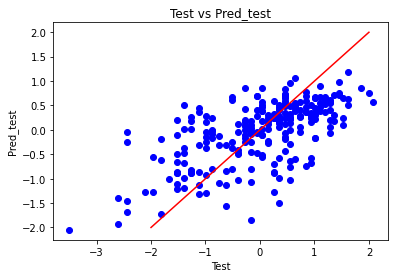

In [13]:
# Сравним эталонные значения Y_train и результат работы обученной нейронной сети Y_pred_train для обучающей выборки.
plt.plot(Y_train, Y_pred_train, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

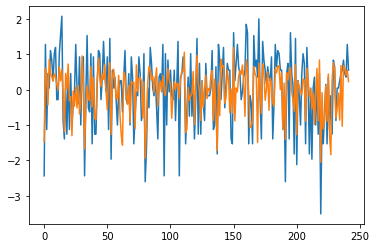

In [14]:
# Выведем сами значения Y_train и Y_pred_train.
plt.plot(Y_train)
plt.plot(Y_pred_train)
plt.show()

In [15]:
# Предсказание обученной нейронной сети на тестовой выборке:
Y_pred_test = model.predict(X_test).flatten()

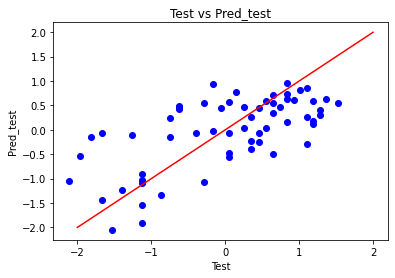

In [16]:
# Сравним эталонные значения Y_test и результат работы обученной нейронной сети Y_pred_test для тестовой выборки.
plt.plot(Y_test, Y_pred_test, 'bo')
plt.plot([-2,2], [-2,2], 'r-')
plt.title('Test vs Pred_test') 
plt.ylabel('Pred_test') 
plt.xlabel('Test') 
plt.show()

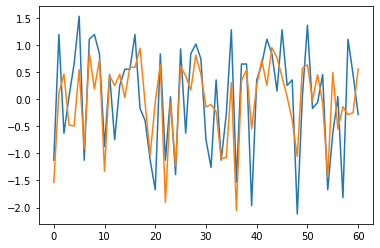

In [17]:
# Выведем сами значения Y_test и Y_pred_test.
plt.plot(Y_test)
plt.plot(Y_pred_test)
plt.show()

In [18]:
# Сравним среднеквадратичные ошибки (значения функции потерь) для обучающей и тестовой выборок.
print(np.sqrt(mean_squared_error(Y_train, Y_pred_train)))
print(np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

0.7765311186331451
0.7370948507431845


In [19]:
# Проверим на нормальное распределение разности пар (Y_train, Y_pred_train), (Y_test, Y_pred_test)
k_train, p_train = stats.shapiro(Y_train - Y_pred_train)
print('Train k = {0}, p = {1}'.format(k_train, p_train))

k_test, p_test = stats.shapiro(Y_test - Y_pred_test)
print('Test k = {0}, p = {1}'.format(k_test, p_test))

Train k = 0.9929332137107849, p = 0.3050242066383362
Test k = 0.9580196738243103, p = 0.03525670990347862


In [20]:
# Для полной выборки (Y, Y_pred) применим два статистических теста: shapiro и normaltest.
Y_pred = model.predict(X).flatten()

k_s, p_s = stats.shapiro(Y - Y_pred)
print('k_s = {0}, p_s = {1}'.format(k_s, p_s))

k_n, p_n = stats.normaltest(Y - Y_pred)
print('k_n = {0}, p_n = {1}'.format(k_n, p_n))

k_s = 0.9914225935935974, p_s = 0.07541687786579132
k_n = 5.003191221036563, p_n = 0.08195412737423881


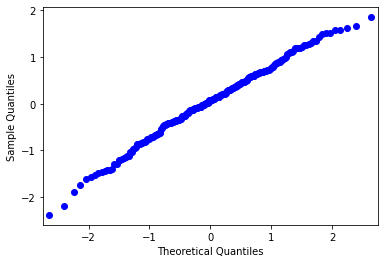

In [21]:
# И тоже самое визуально, с помощью грфиков квантиль-квантиль.
# Обучающая выборка
qqplot(Y_train - Y_pred_train)
plt.show()

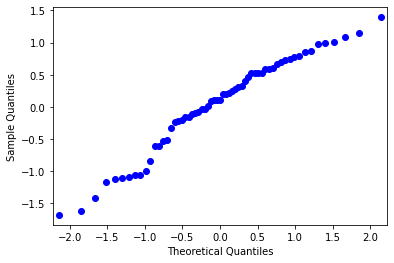

In [22]:
# Тестовая выборка
qqplot(Y_test - Y_pred_test)
plt.show()

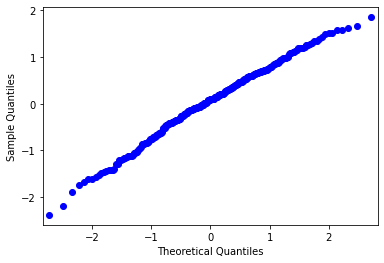

In [23]:
# Полная выборка
qqplot(Y - Y_pred)
plt.show()

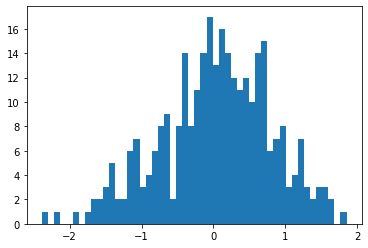

In [24]:
plt.hist(Y - Y_pred, bins=50)
plt.show()

In [25]:
model.save('SimpleNeuralNetwork.h5')